In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
## Load the data set
data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
## Preprocessing the data
## Drop the irrelevant data
data= data.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
# Encode Categorical Variables
label_encoder_gender = LabelEncoder()
data["Gender"] = label_encoder_gender.fit_transform(data["Gender"])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [12]:
# OneHot Encoder "Geography"

from sklearn.preprocessing import OneHotEncoder

In [13]:
OneHot_Encoder_geo = OneHotEncoder()
geo_encoder = OneHot_Encoder_geo.fit_transform(data[["Geography"]])
geo_encoder

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10000 stored elements and shape (10000, 3)>

In [14]:
geo_encoder.toarray()

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [15]:
OneHot_Encoder_geo.get_feature_names_out(["Geography"])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [16]:
geo_encoder_df = pd.DataFrame(geo_encoder.toarray(), columns= OneHot_Encoder_geo.get_feature_names_out(["Geography"]))
geo_encoder_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [17]:
## Combine one hot encoder columns into the orginal data
data = pd.concat([data.drop("Geography", axis=1), geo_encoder_df], axis=1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


<Axes: >

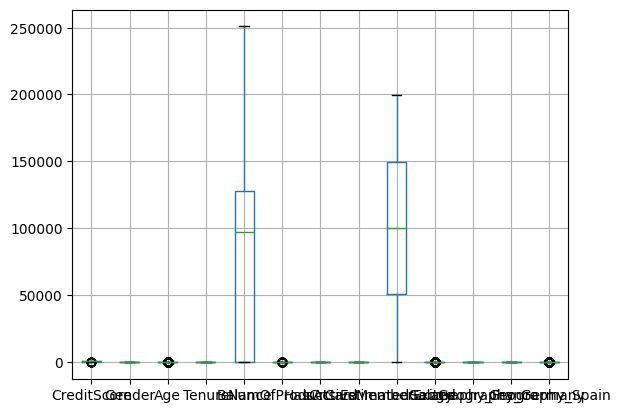

In [18]:
## Check the outliers

data.boxplot()

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

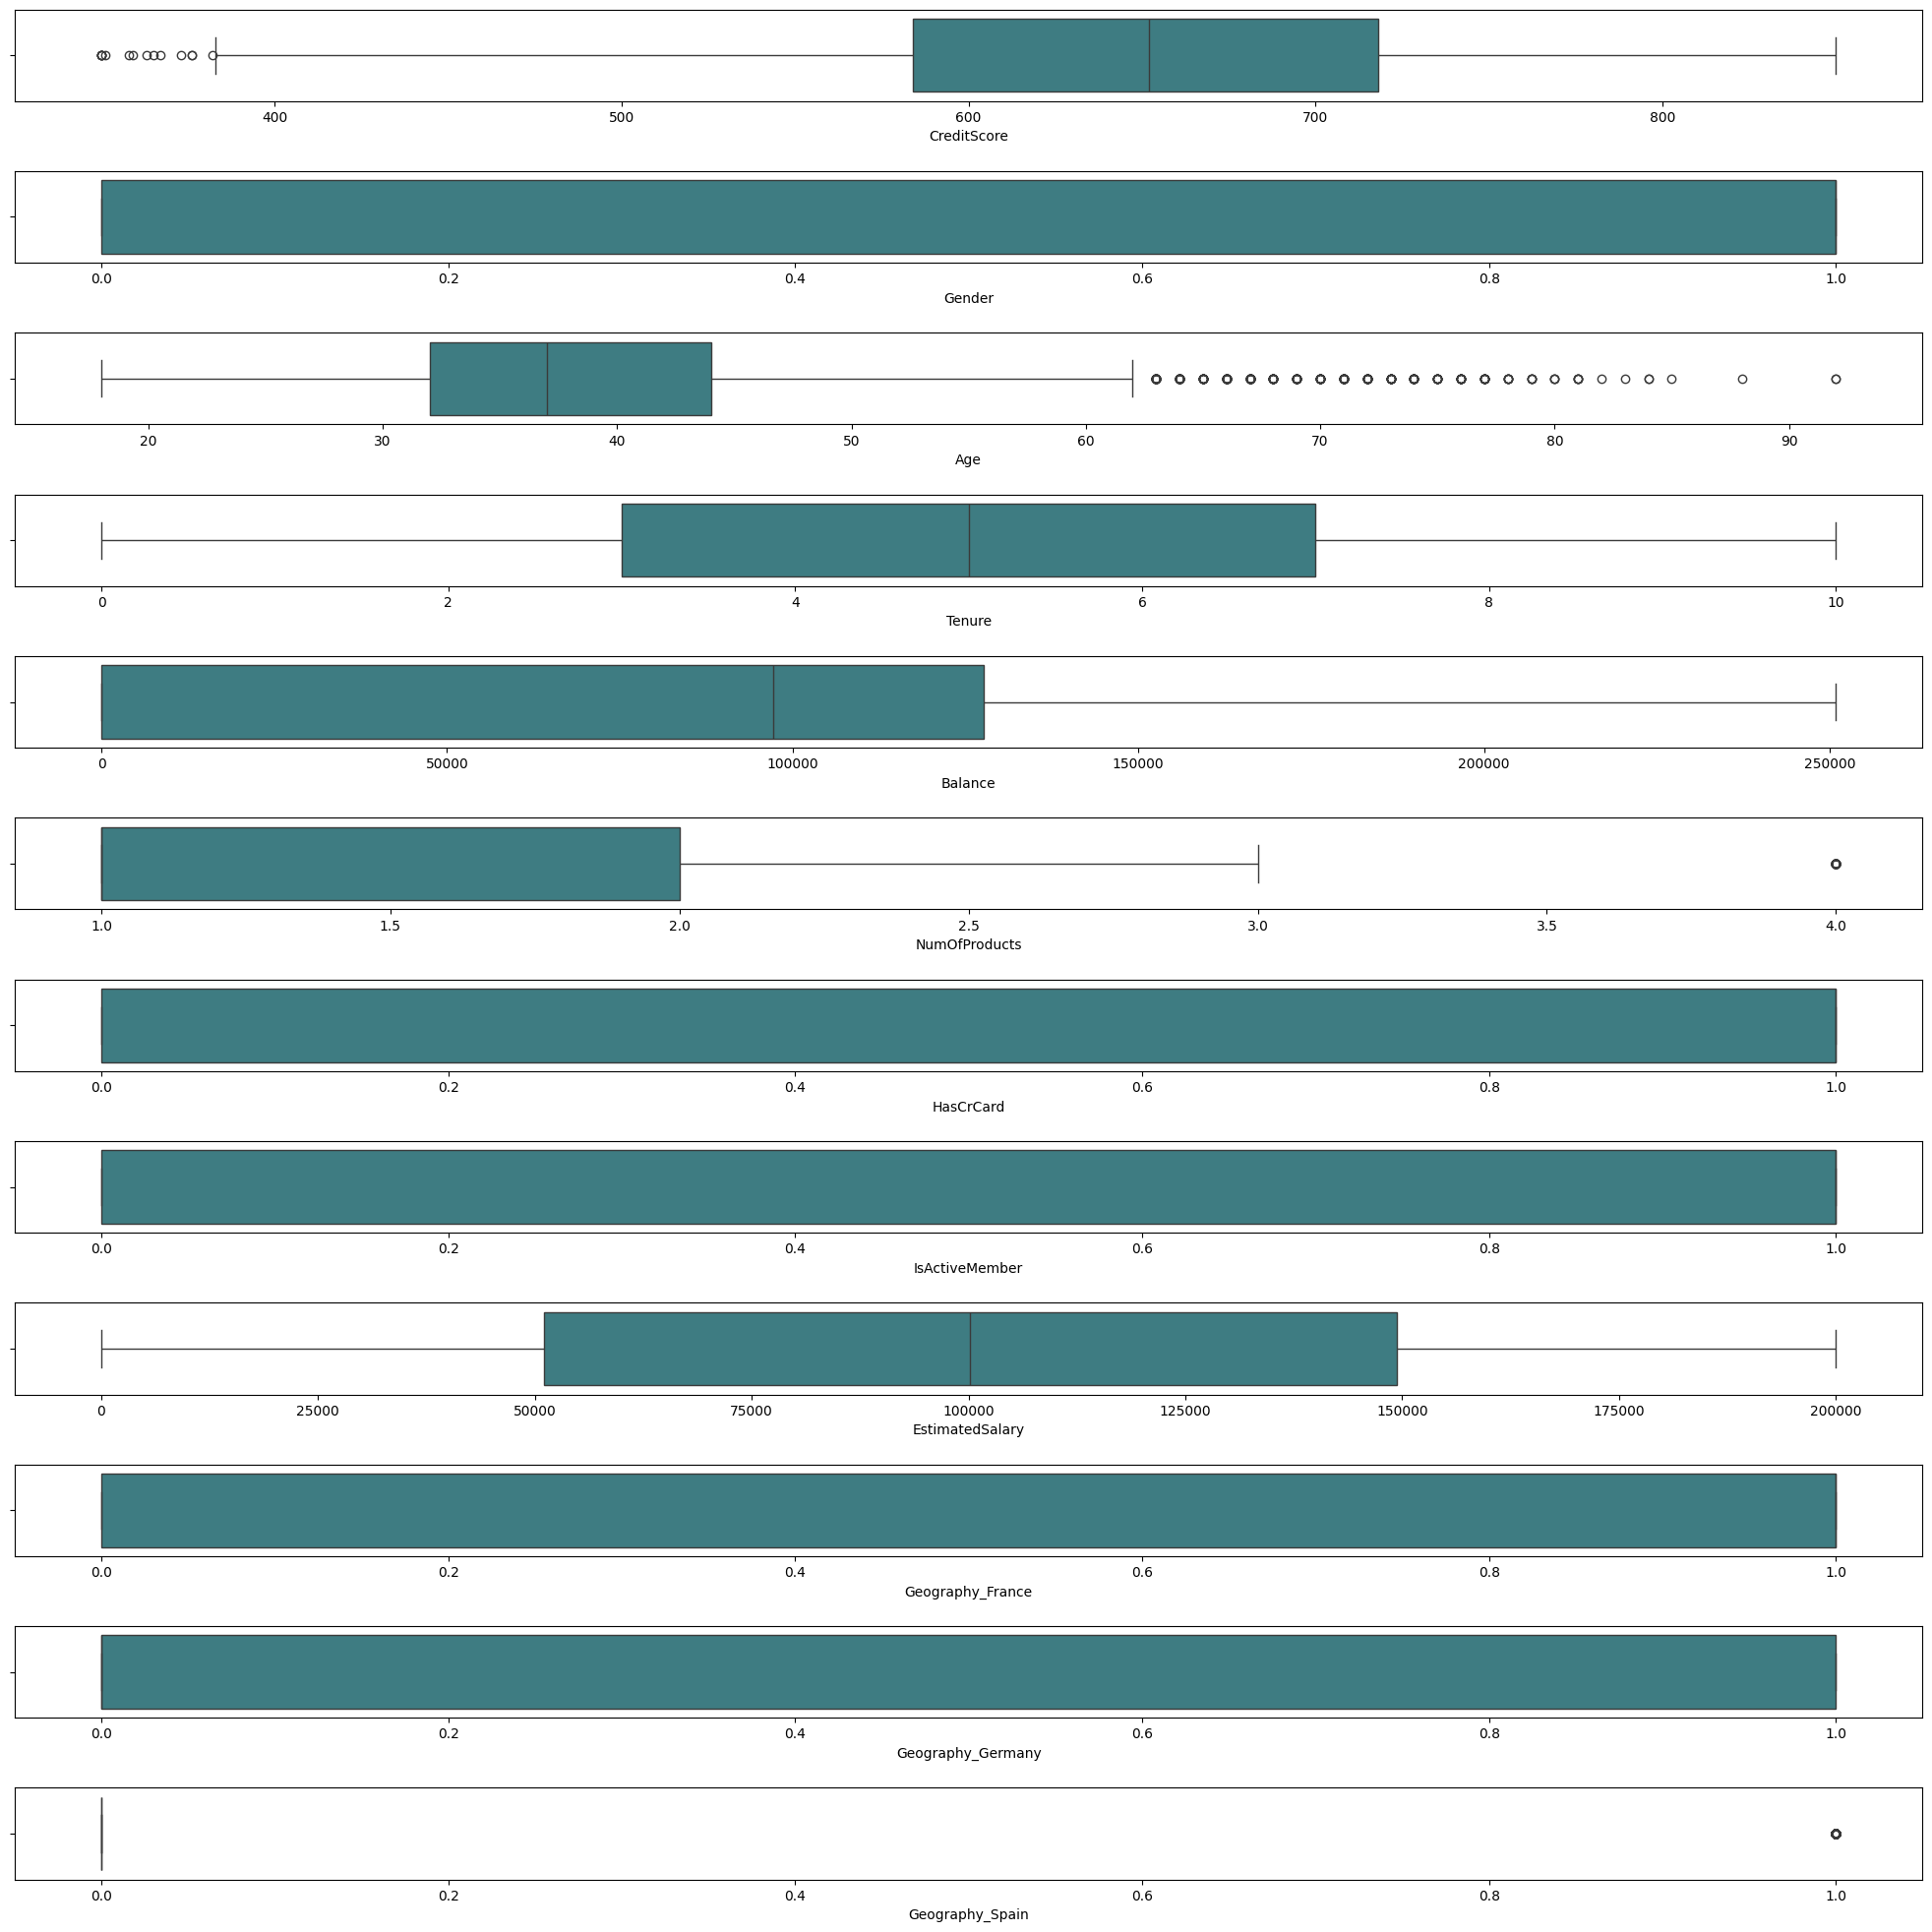

In [20]:
ot=data.copy() 
fig, axes=plt.subplots(12,1,figsize=(20,20),sharex=False,sharey=False)
sns.boxplot(x='CreditScore',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Gender',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Age',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Tenure',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Balance',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='NumOfProducts',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='HasCrCard',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='IsActiveMember',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='EstimatedSalary',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='Geography_France',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='Geography_Germany',data=ot,palette='crest',ax=axes[10])
sns.boxplot(x='Geography_Spain',data=ot,palette='crest',ax=axes[11])
plt.tight_layout(pad=2.0)

In [21]:
## Save the encoders and scaler 
with open('label_encoder_gender.pkl', 'wb') as file:
    pickle.dump(label_encoder_gender,file)

with open('OneHot_Encoder_geo.pkl', 'wb') as file:
    pickle.dump(OneHot_Encoder_geo,file)

In [22]:
## Divide the dataset into independent and dependent features

x = data.drop('Exited', axis=1) 
y = data['Exited']

## Split the data in training and testsing section

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

## Scaled the features

scaler = StandardScaler()

x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [23]:
x_train

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [24]:
x_test

array([[-0.57749609,  0.91324755, -0.6557859 , ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.29729735,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.52560743, -1.09499335,  0.48508334, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.81311987, -1.09499335,  0.77030065, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.41876609,  0.91324755, -0.94100321, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.24540869,  0.91324755,  0.00972116, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [25]:
y_train

9254    0
1561    0
1670    1
6087    1
6669    1
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: Exited, Length: 8000, dtype: int64

In [26]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64

In [27]:
with open ('scaler.pkl', 'wb') as file:
    pickle.dump(scaler,file)

ANN Implementation

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

In [35]:
(x_train.shape[1],)

(12,)

In [36]:
## Build ANN Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)), ##First Hidden Layer
    Dense(32, activation='relu'),## Hidden Layer two
    Dense(1, activation='sigmoid') ## Output layer
]
)

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
loss = tensorflow.keras.losses.BinaryCrossentropy()

In [41]:
##Compile the model

model.compile(optimizer=opt, loss=loss,metrics=['accuracy'])

In [43]:
## Setup the Tensorboard

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback = TensorBoard(log_dir=log_dir,histogram_freq=1)

In [50]:
##Setup Early Stopping

early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10,restore_best_weights=True)

In [51]:
## Train the model

history = model.fit(
    x_train,y_train,validation_data=(x_test,y_test), epochs=100,
    callbacks = [tensorflow_callback,early_stopping_callback]
)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.2127 - accuracy: 0.9070 - val_loss: 0.6553 - val_accuracy: 0.8460
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.2014 - accuracy: 0.9116 - val_loss: 0.6967 - val_accuracy: 0.8435
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.2049 - accuracy: 0.9070 - val_loss: 0.6669 - val_accuracy: 0.8405
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.2031 - accuracy: 0.9097 - val_loss: 0.6831 - val_accuracy: 0.8420
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.2060 - accuracy: 0.9069 - val_loss: 0.6657 - val_accuracy: 0.8410
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.1986 - accuracy: 0.9110 - val_loss: 0.7017 - val_accuracy: 0.8350
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.2047 - accuracy: 0.9090 - val_loss: 0.7541 - val_accuracy: 0.8415

In [52]:
model.save("model.h5")

In [53]:
#Load Tensorboard Extension

%load_ext tensorboard

In [56]:
%tensorboard --logdir logs/fit20241104-142859

Reusing TensorBoard on port 6006 (pid 30924), started 0:00:14 ago. (Use '!kill 30924' to kill it.)